# EDA-3. Проектирование признаков

### 5. Кодирование признаков. Методы

In [2]:
import pandas as pd
import category_encoders as ce

In [3]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [4]:
encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)
clothing

,size,type,type_1,type_2,type_3,type_4
0,xxs,dress,1,0,0,0
1,xxs,skirt,0,1,0,0
2,xs,dress,1,0,0,0
3,s,skirt,0,1,0,0
4,m,dress,1,0,0,0
5,l,shirt,0,0,1,0
6,s,coat,0,0,0,1
7,m,coat,0,0,0,1
8,xxl,shirt,0,0,1,0
9,l,dress,1,0,0,0


In [5]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_1,type_2,type_3,type_4,type_0,type_1,type_2
0,xxs,dress,1,0,0,0,0,0,1
1,xxs,skirt,0,1,0,0,0,1,0
2,xs,dress,1,0,0,0,0,0,1
3,s,skirt,0,1,0,0,0,1,0
4,m,dress,1,0,0,0,0,0,1
5,l,shirt,0,0,1,0,0,1,1
6,s,coat,0,0,0,1,1,0,0
7,m,coat,0,0,0,1,1,0,0
8,xxl,shirt,0,0,1,0,0,1,1
9,l,dress,1,0,0,0,0,0,1


# 6. Преобразование признаков. Нормализация. Стандартизация

In [6]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

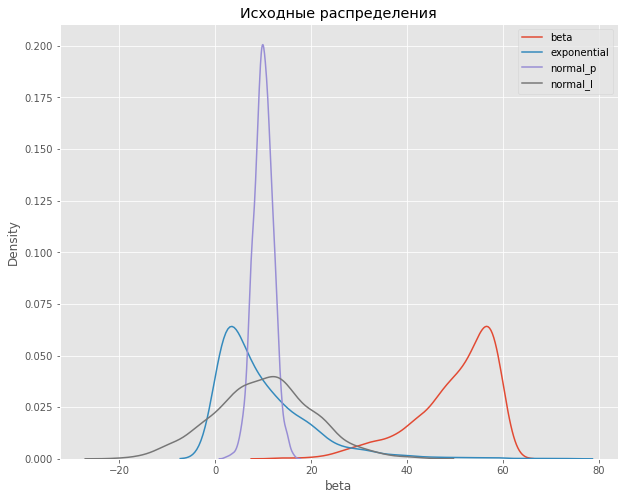

In [7]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

# 8. Проверка знаний

Задание 8.1

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [8]:
heart = pd.read_csv('data\heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [10]:
heart['old'].sum()

79

Задание 8.2

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

In [38]:
def st_pressure(arg):
    if arg.age < 21 and arg.sex == 1:
        return 123
    elif arg.age < 21 and arg.sex == 0:
        return 116
    elif arg.age < 31 and arg.sex == 1:
        return 126
    elif arg.age < 31 and arg.sex == 0:
        return 120
    elif arg.age < 41 and arg.sex == 1:
        return 129
    elif arg.age < 41 and arg.sex == 0:
        return 127
    elif arg.age < 51 and arg.sex == 1:
        return 135
    elif arg.age < 51 and arg.sex == 0:
        return 137
    elif arg.age < 61 and arg.sex == 1:
        return 142
    elif arg.age < 61 and arg.sex == 0:
        return 144
    elif arg.sex == 1:
        return 142
    else:
        return 159
heart['trestbps_mean'] = heart[['age','sex']].apply(st_pressure, axis = 1)

In [48]:
heart['trestbps_mean'].iloc[300]

142

In [35]:
heart[['age','sex']]

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0
...,...,...
298,57,0
299,45,1
300,68,1
301,57,1


Задание 8.3

Проанализируйте датасет и выберите категориальные признаки.

In [60]:
# создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in heart.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, heart[col].nunique(),heart[col].dtypes) 
    # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,sex,2,int64
1,fbs,2,int64
2,exang,2,int64
3,target,2,int64
4,old,2,int64
5,restecg,3,int64
6,slope,3,int64
7,cp,4,int64
8,thal,4,int64
9,ca,5,int64


Задание 8.5

Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.

Сколько признаков получилось в датасете?

In [61]:
encoder = ce.OneHotEncoder(cols=['cp']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['cp'])
heart = pd.concat([heart, type_bin], axis=1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean,cp_1,cp_2,cp_3,cp_4
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144,0,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135,1,0,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142,0,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142,0,0,0,1


In [62]:
encoder = ce.OneHotEncoder(cols=['restecg']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['restecg'])
heart = pd.concat([heart, type_bin], axis=1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,old,trestbps_mean,cp_1,cp_2,cp_3,cp_4,restecg_1,restecg_2,restecg_3
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,142,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,129,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,137,0,0,1,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,142,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,144,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,144,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,0,0,135,1,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,0,1,142,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,142,0,0,0,1,0,1,0


In [63]:
encoder = ce.OneHotEncoder(cols=['slope']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['slope'])
heart = pd.concat([heart, type_bin], axis=1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,cp_4,restecg_1,restecg_2,restecg_3,slope_1,slope_2,slope_3
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,0,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,1,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,0,1,0,1,0,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,...,1,0,0,0,0,1,0,0,0,1
300,68,1,0,144,193,1,1,141,0,3.4,...,0,0,0,1,0,1,0,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,0,1,0,1,0,0,0,1


In [64]:
encoder = ce.OneHotEncoder(cols=['ca']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['ca'])
heart = pd.concat([heart, type_bin], axis=1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,restecg_2,restecg_3,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,0,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,1,0,0,1,0,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,0,1,0,1,0,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,1,0,1,0,0,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,0,0,0,1,1,0,0,0,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,0,0,0,1,1,0,0,0,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,0,0,1,0,1,0,0,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,0,1,0,0,1,0,0


In [65]:
encoder = ce.OneHotEncoder(cols=['thal']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['thal'])
heart = pd.concat([heart, type_bin], axis=1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


In [66]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

Задание 8.6

Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

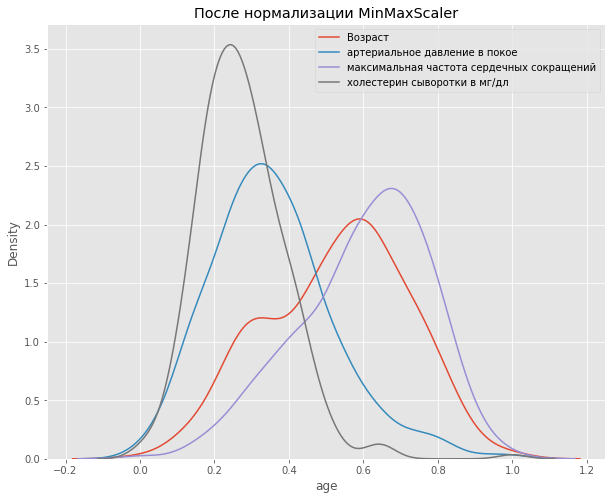

In [77]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()
col_names = ['age','trestbps','thalach','chol']
# копируем исходный датасет
df_hh = mm_scaler.fit_transform(heart[col_names])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_hh = pd.DataFrame(df_hh, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_hh['age'], ax=ax1, label = 'Возраст')
sns.kdeplot(df_hh['trestbps'], ax=ax1, label = 'артериальное давление в покое')
sns.kdeplot(df_hh['thalach'], ax=ax1, label = 'максимальная частота сердечных сокращений')
sns.kdeplot(df_hh['chol'], ax=ax1, label = 'холестерин сыворотки в мг/дл')
plt.legend()

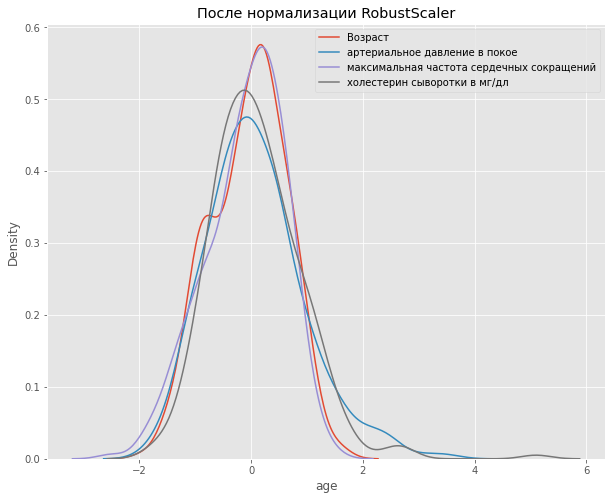

In [79]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = ['age','trestbps','thalach','chol']
# копируем исходный датасет
df_hh = r_scaler.fit_transform(heart[col_names])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_hh = pd.DataFrame(df_hh, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации RobustScaler')

sns.kdeplot(df_hh['age'], ax=ax1, label = 'Возраст')
sns.kdeplot(df_hh['trestbps'], ax=ax1, label = 'артериальное давление в покое')
sns.kdeplot(df_hh['thalach'], ax=ax1, label = 'максимальная частота сердечных сокращений')
sns.kdeplot(df_hh['chol'], ax=ax1, label = 'холестерин сыворотки в мг/дл')
plt.legend()

In [81]:
df_hh['chol'].describe()

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol, dtype: float64

<AxesSubplot:>

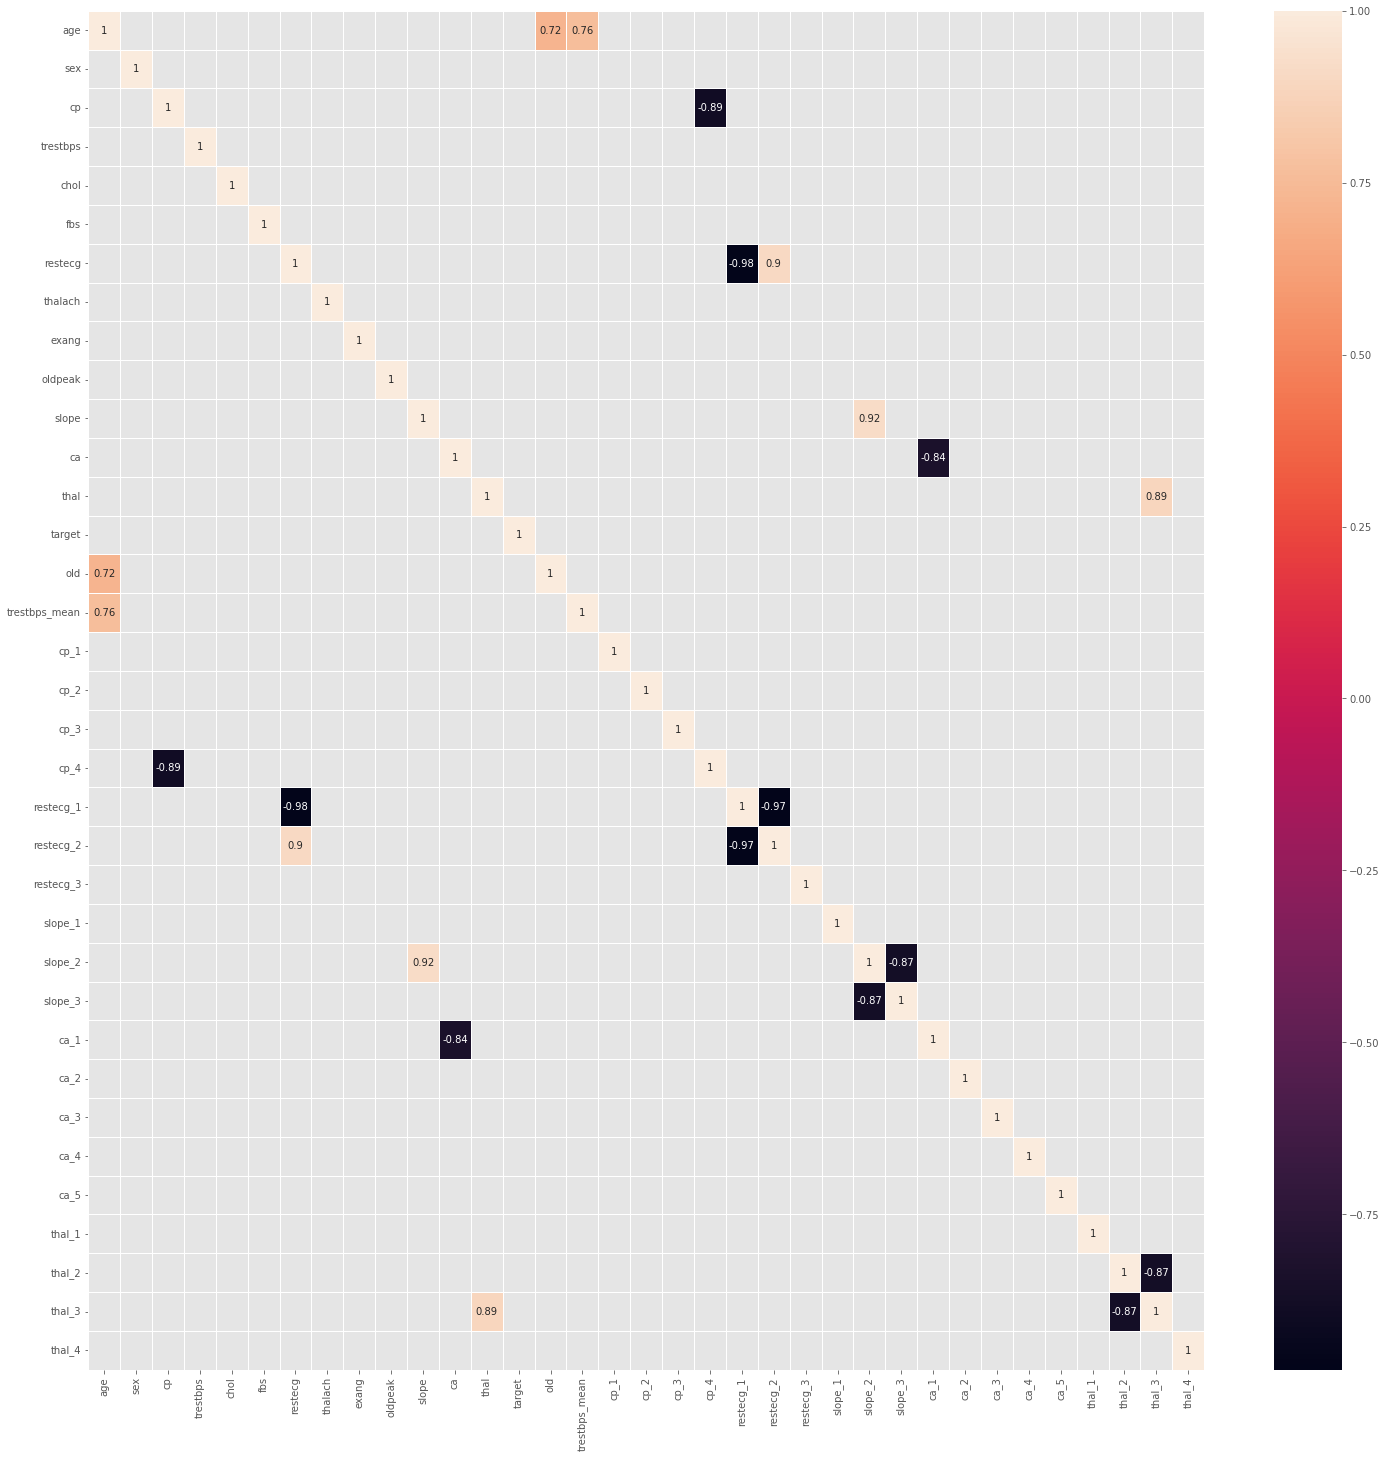

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 25))
corr_df = heart.corr(method='pearson')
sns.heatmap(corr_df[abs(corr_df) >= 0.7], annot=True, linewidths=.5, ax=axes)